In [1]:
# PREDICTION PIPELINE
# ---------------------------
# 1. load the data
# 2. Feature Engineering Steps / Data Preprocessing or Cleansing Steps
#         removal/filling of null values
#         removal of duplicate values
#         removing outliers
#         standardization & scaling
#         encoding categorical variable
# 3. Split the data into train & test data
# 4. Select approriate model
# 5. fit the model on training data
#         so that model is able to capture the features
#         it is a training part
# 6. derive prediction on the test data
# 7. generate algorithm metrics
#         to determine how good a model is performing
# 8. tune model parameters
# 9. retrain the model(frorm step 6)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report,silhouette_score
from time import time
import string
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\Rachamalla\\Desktop\\Anaconda_Python\\miniProject'

In [4]:
#read the dataset

# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/ACADEMICS/Verzeo ML/PROJECTS/MAJOR PROJECT/Corona_NLP (2).csv', encoding = 'latin1')

df = pd.read_csv('C:/Users/Rachamalla/Desktop/Anaconda_Python/miniProject/cyber_labelled.csv')

# ***Feature Engineering Steps / Data Preprocessing Steps***
####        removal/filling of null values
####        removal of duplicate values
####        removing outliers
####        standardization & scaling
####        encoding categorical variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  35787 non-null  object
 1   label      35787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 559.3+ KB


In [6]:
df.dtypes

full_text    object
label         int64
dtype: object

In [7]:
# no.of rows, no.of columns  of the dataframe
df.shape

(35787, 2)

In [8]:
# Checking of null values
df.isnull().sum()

full_text    0
label        0
dtype: int64

In [9]:
# Description about the dataframe df
df.describe()

label
count  35787.000000
mean       0.657529
std        0.474543
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [10]:
df.head()

full_text  label
0  So Drasko just said he was impressed the girls...      1
1  Drasko they didn't cook half a bird you idiot ...      1
2  Hopefully someone cooks Drasko in the next ep ...      1
3  of course you were born in serbia...you're as ...      1
4  These girls are the equivalent of the irritati...      1

In [11]:
df['classification']=df['label'].replace(1,'Bullying')
df['classification']=df['classification'].replace(0,'Non-Bullying')
df

full_text  label classification
0      So Drasko just said he was impressed the girls...      1       Bullying
1      Drasko they didn't cook half a bird you idiot ...      1       Bullying
2      Hopefully someone cooks Drasko in the next ep ...      1       Bullying
3      of course you were born in serbia...you're as ...      1       Bullying
4      These girls are the equivalent of the irritati...      1       Bullying
...                                                  ...    ...            ...
35782  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      1       Bullying
35783  you've gone and broke the wrong heart baby, an...      0   Non-Bullying
35784  young buck wanna eat!!.. dat nigguh like I ain...      1       Bullying
35785              youu got wild bitches tellin you lies      1       Bullying
35786  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      0   Non-Bullying

[35787 rows x 3 columns]

In [12]:
df.head()

full_text  label classification
0  So Drasko just said he was impressed the girls...      1       Bullying
1  Drasko they didn't cook half a bird you idiot ...      1       Bullying
2  Hopefully someone cooks Drasko in the next ep ...      1       Bullying
3  of course you were born in serbia...you're as ...      1       Bullying
4  These girls are the equivalent of the irritati...      1       Bullying

In [13]:
df.tail()

full_text  label classification
35782  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      1       Bullying
35783  you've gone and broke the wrong heart baby, an...      0   Non-Bullying
35784  young buck wanna eat!!.. dat nigguh like I ain...      1       Bullying
35785              youu got wild bitches tellin you lies      1       Bullying
35786  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      0   Non-Bullying

In [14]:
df.sample()

full_text  label classification
15172  @Morning_Joe You bitch and complain about how ...      1       Bullying

In [15]:
# checking for im-balance
df['classification'].value_counts()

Bullying        23531
Non-Bullying    12256
Name: classification, dtype: int64

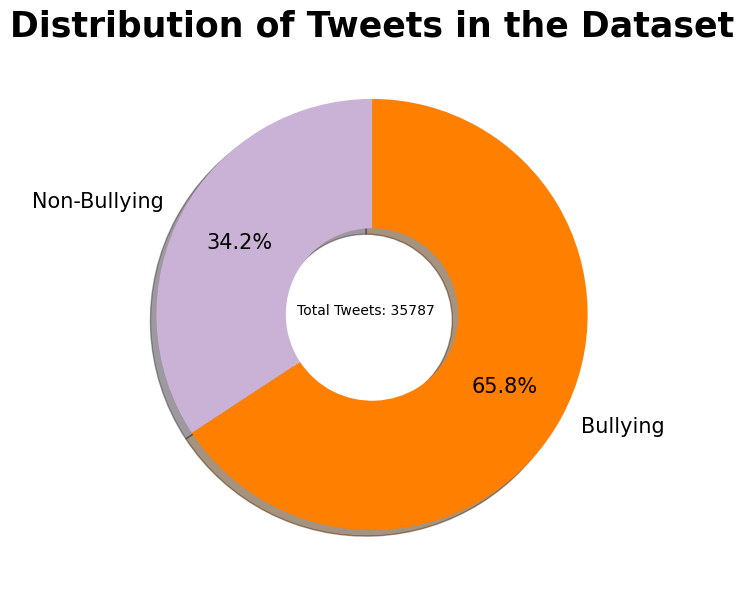

In [16]:
plt.figure(figsize = (7,7))
sorted_counts = df['classification'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontweight= 'bold', fontsize = 25);

In [17]:
# !pip install nltk
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords') # it is one of the preprocessing step
stopwords = stopwords.words('english')
nltk.download('omw-1.4')
from nltk import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
# https://www.nltk.org/data.html
# https://www.nltk.org/nltk_data/

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [20]:
print(df.sample(10))
def remove_punctuation(text):
#     filtered_text = "".join(re.sub('[^a-zA-Z]', ' ', text))
    filtered_text="".join([char for char in text if char not in string.punctuation])
    filtered_text=re.sub('[0-9]+',' ',filtered_text)
    return filtered_text
#     text = re.sub('[0-9]+', ' ', text)
#     return filtered_text
df['full_text'] = df['full_text'].apply(lambda x : remove_punctuation(x))
print(df['full_text'].sample(5))

def word_tokenization(text):
    filtered_text = word_tokenize(text, preserve_line=True)
    return filtered_text
df['full_text'] = df['full_text'].apply(lambda text : word_tokenization(text.lower()))
print(df['full_text'].sample(5))

def stopwords_removal(text):
    filtered_text = [word for word in text if word not in stopwords]
    return filtered_text
df['full_text'] = df['full_text'].apply(lambda text : stopwords_removal(text))
print(df['full_text'].sample(5))

def lemmatization(text):
    filtered_text = [lm.lemmatize(word) for word in text]
    return filtered_text
df['full_text'] = df['full_text'].apply(lambda text : lemmatization(text))
print(df['full_text'].sample(5))

def convert_lower(text):
    filtered_text = str(text).lower()
    return filtered_text
df['full_text'] = df['full_text'].apply(lambda text : convert_lower(text))
print(df['full_text'].sample(5))

df.head(10)

                                               full_text  label classification
21847      ['really', 'want', 'girl', 'make', 'brownie']      0   Non-Bullying
21230                          ['dont', 'like', 'bitch']      1       Bullying
1030   ['boxedariel', 'none', 'thing', 'true', 'retur...      1       Bullying
14378  ['highofftatianna', 'lol', 'fuck', 'lil', 'bit...      1       Bullying
24825  ['photo', 'bad', 'bitch', 'ladykimora', 'favor...      1       Bullying
28648  ['rt', 'thecockiestman', 'shes', 'really', 'ni...      1       Bullying
24639  ['one', 'man', 'trash', 'anothers', 'transform...      0   Non-Bullying
3517   ['holy', 'crap', 'wasted', 'min', 'prep', 'tim...      0   Non-Bullying
19369  ['cant', 'trust', 'every', 'face', 'bitch', 'g...      1       Bullying
812    ['dreysander', 'dunno', 'knowing', 'know', 'to...      1       Bullying
3307     rt thefixninemsn saved tail spatchcock mkr pro...
3343     forgot annoying annie happens series go ten ye...
22485    idon

full_text  label classification
0  ['drasko', 'said', 'impressed', 'girl', 'cooke...      1       Bullying
1  ['drasko', 'didnt', 'cook', 'half', 'bird', 'i...      1       Bullying
2  ['hopefully', 'someone', 'cook', 'drasko', 'ne...      1       Bullying
3  ['course', 'born', 'serbiayoure', 'fucked', 's...      1       Bullying
4  ['girl', 'equivalent', 'irritating', 'asian', ...      1       Bullying
5  ['mkr', 'lost', 'plot', 'wheres', 'big', 'texa...      1       Bullying
6  ['rt', 'phxken', 'sir', 'winston', 'churchhill...      1       Bullying
7  ['rt', 'therightwingm', 'giuliani', 'watched',...      1       Bullying
8  ['rt', 'yesyoureracist', 'least', 'youre', 'ti...      1       Bullying
9  ['misfitinchains', 'oldgfatherclock', 'venerev...      1       Bullying

In [ ]:
x = df['full_text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)
x_train = count_vector.fit_transform(x_train)
x_test = count_vector.transform(x_test)

# training_data = count_vector.fit_transform(X_train)
# testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier